Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
logins = pd.read_json('logins.json')
df = pd.DataFrame(logins, columns = ['login_time'], index = None)

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#Checking for any missing values
print(df.isnull().sum())
print(df.isna().sum())

login_time    0
dtype: int64
login_time    0
dtype: int64


In [11]:
#looking to get 15 minute intervals of the logins
#first create a dup column? I am running into some visualization error, so let me try this
df['fifteen_interval'] = df['login_time']

interval_table = df.groupby(pd.Grouper(key='login_time', freq='15min')).count()
interval_table

,fifteen_interval
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


So this is a start, but it's not really helpful to see what is going on as a trend. I think what may be next is to go by day of the week, month, time of day, so that we can see when activity is highest

In [13]:
df['month'] = df['fifteen_interval'].dt.month
df.head()

,login_time,fifteen_interval,month
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [15]:
df['day'] = df['fifteen_interval'].dt.day
df.head()

,login_time,fifteen_interval,month,day
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1,1
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1,1
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1,1
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1,1
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1,1


In [16]:
#so here I can decide if I want to do like a 'morning', 'afternoon', 'evening', split. I think first what I will 
#do is create a column by the hour and then decide later if spending time making this split is worthwhile.
df['hour'] = df['fifteen_interval'].dt.hour
df.head()

,login_time,fifteen_interval,month,day,hour
0,1970-01-01 20:13:18,1970-01-01 20:13:18,1,1,20
1,1970-01-01 20:16:10,1970-01-01 20:16:10,1,1,20
2,1970-01-01 20:16:37,1970-01-01 20:16:37,1,1,20
3,1970-01-01 20:16:36,1970-01-01 20:16:36,1,1,20
4,1970-01-01 20:26:21,1970-01-01 20:26:21,1,1,20


In [18]:
#so now I will prepare the data to be visualized by issuing a value counts over the new columns
by_month = df['month'].value_counts().sort_index()
by_day = df['day'].value_counts().sort_index()
by_hour = df['hour'].value_counts().sort_index()

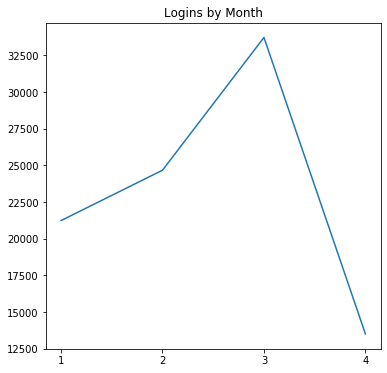

In [39]:
import matplotlib.pyplot as plt
#visualizing month
by_month.plot(xticks=[1, 2, 3, 4], figsize=(6, 6), title='Logins by Month')
plt.show()

With our only 4 month period, it looks as though March had a large increase in logins, while april had a steep drop. While it looks like Ultimate inc is a commercial construction company, not sure why there would be such a decrease in april, but more to come on that I suppose.

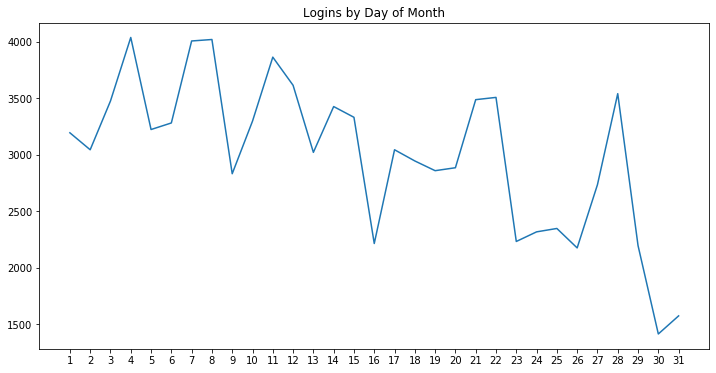

In [44]:
#visualizing day
by_day.plot(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 
                27, 28, 29, 30, 31], figsize=(12, 6), title='Logins by Day of Month')
plt.show()

Important to note that februrary has less days in it so aside from the steep drop near the 30 mark, it looks like users are slightly more likely to log in at the beginning of the month, rather than the end. However, with such a small amount of months in our dataset, I would hate to commit this to an absolute. Based on the data however, we see that there are more logins towards the beginning of months

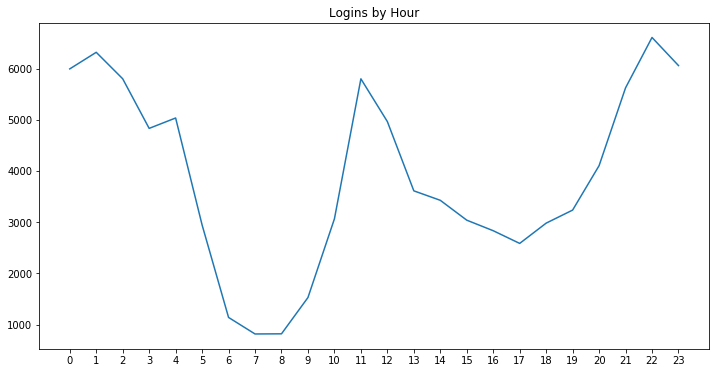

In [45]:
#visualizing hour of day
by_hour.plot(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
         figsize=(12, 6), title='Logins by Hour')
plt.show()

So it looks like we are seeing a wave pattern here, with logins at the middle of the day, but also very late in the evening and during the midnight hours. For a firm like this, I find this odd, but there may be reasoning for it. May be because of the simulation.